In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2021/train.csv
/kaggle/input/tabular-playground-series-may-2021/test.csv


In [3]:
train=pd.read_csv('/kaggle/input/tabular-playground-series-may-2021/train.csv')
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  int64 
 1   feature_0   100000 non-null  int64 
 2   feature_1   100000 non-null  int64 
 3   feature_2   100000 non-null  int64 
 4   feature_3   100000 non-null  int64 
 5   feature_4   100000 non-null  int64 
 6   feature_5   100000 non-null  int64 
 7   feature_6   100000 non-null  int64 
 8   feature_7   100000 non-null  int64 
 9   feature_8   100000 non-null  int64 
 10  feature_9   100000 non-null  int64 
 11  feature_10  100000 non-null  int64 
 12  feature_11  100000 non-null  int64 
 13  feature_12  100000 non-null  int64 
 14  feature_13  100000 non-null  int64 
 15  feature_14  100000 non-null  int64 
 16  feature_15  100000 non-null  int64 
 17  feature_16  100000 non-null  int64 
 18  feature_17  100000 non-null  int64 
 19  feature_18  100000 non-n

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100000.0,49999.50000,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
feature_0,100000.0,0.25783,0.929033,0.0,0.00,0.0,0.00,10.0
feature_1,100000.0,0.43172,1.977862,0.0,0.00,0.0,0.00,31.0
feature_2,100000.0,0.11413,0.519584,0.0,0.00,0.0,0.00,6.0
feature_3,100000.0,0.59055,1.844558,0.0,0.00,0.0,0.00,26.0
feature_4,100000.0,0.59977,2.785531,0.0,0.00,0.0,0.00,38.0
feature_5,100000.0,0.16082,0.601149,0.0,0.00,0.0,0.00,10.0
feature_6,100000.0,0.73149,2.343465,0.0,0.00,0.0,0.00,27.0
feature_7,100000.0,1.22892,2.692732,0.0,0.00,0.0,1.00,31.0
feature_8,100000.0,0.90335,3.415258,0.0,0.00,0.0,0.00,39.0


## Imbalanced classes

<AxesSubplot:xlabel='target', ylabel='count'>

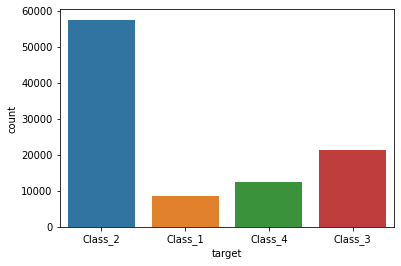

In [6]:
import seaborn as sns
sns.countplot(x='target',data=train)

<AxesSubplot:xlabel='target', ylabel='count'>

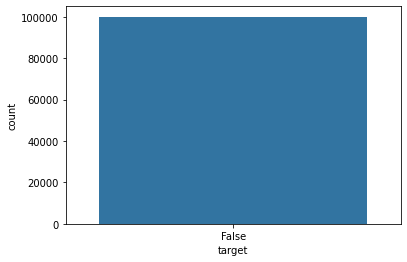

In [7]:
import seaborn as sns
sns.countplot(x='target',data=train.isnull())

No missing values

### Dropping id and target columns

In [8]:
train_EDA=train.drop(columns=['id','target'])
train_EDA.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,...,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Distribution of data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'feature_0'),
  Text(1, 0, 'feature_1'),
  Text(2, 0, 'feature_2'),
  Text(3, 0, 'feature_3'),
  Text(4, 0, 'feature_4'),
  Text(5, 0, 'feature_5'),
  Text(6, 0, 'feature_6'),
  Text(7, 0, 'feature_7'),
  Text(8, 0, 'feature_8'),
  Text(9, 0, 'feature_9'),
  Text(10, 0, 'feature_10'),
  Text(11, 0, 'feature_11'),
  Text(12, 0, 'feature_12'),
  Text(13, 0, 'feature_13'),
  Text(14, 0, 'feature_14'),
  Text(15, 0, 'feature_15'),
  Text(16, 0, 'feature_16'),
  Text(17, 0, 'feature_17'),
  Text(18, 0, 'feature_18'),
  Text(19, 0, 'feature_19'),
  Text(20, 0, 'feature_20'),
  Text(21, 0, 'feature_21'),
  Text(22, 0, 'feature_22'),
  Text(23, 0, 'feature_23'),
  Text(24, 0, 'feature_24'),
  Text(25, 0, 'feature_25'),
  Text(26, 0, 'feature_26'),
  Text(27, 

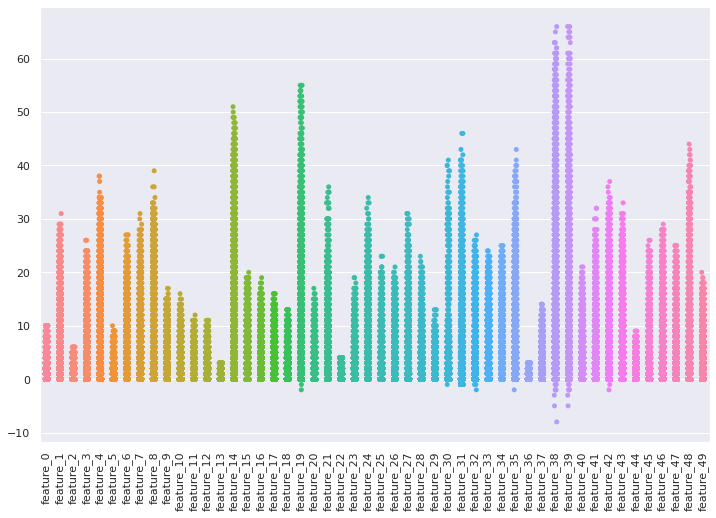

In [9]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,8)})
sns.stripplot(data=train_EDA)
plt.xticks(rotation='vertical')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


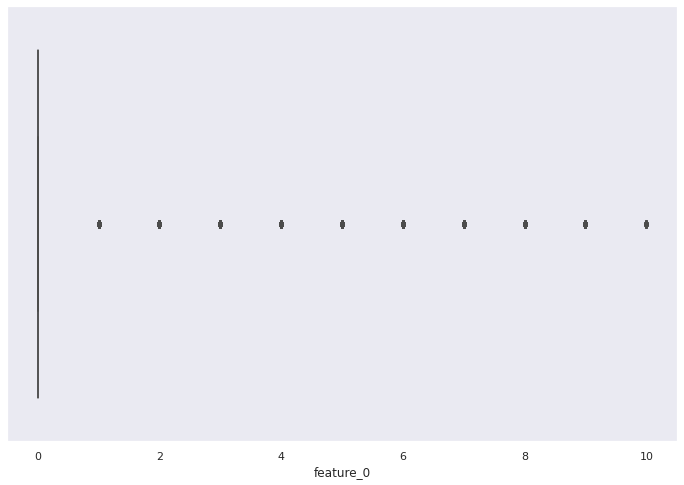

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


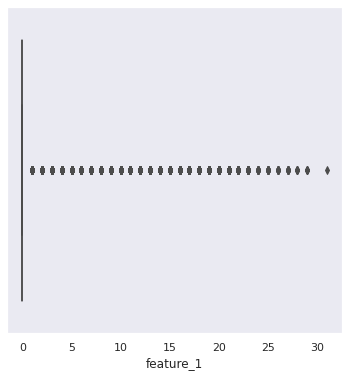

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


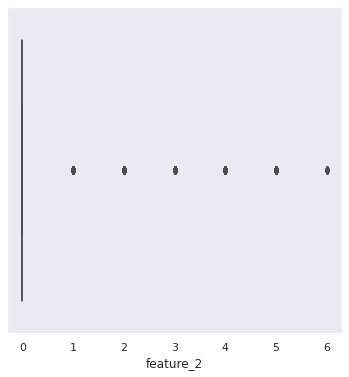

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


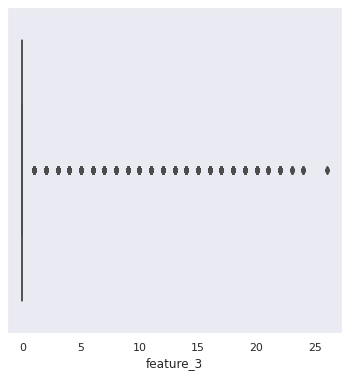

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


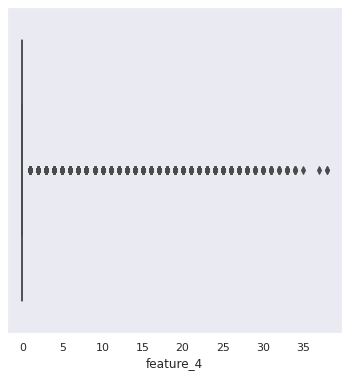

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


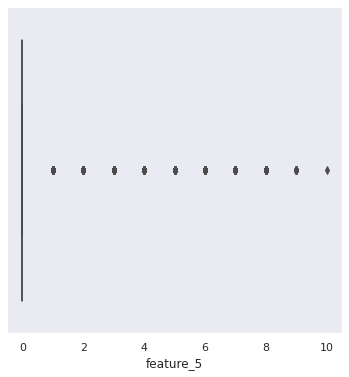

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


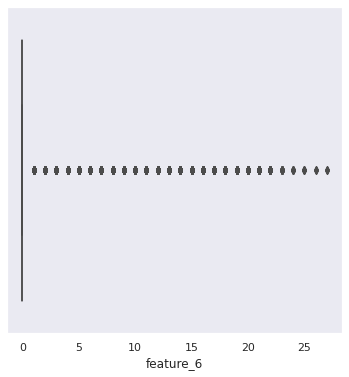

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


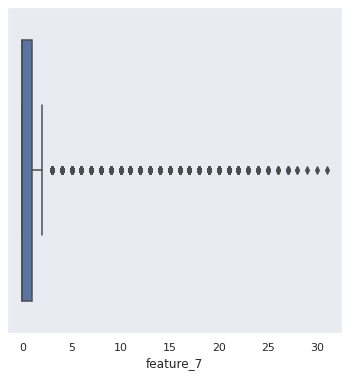

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


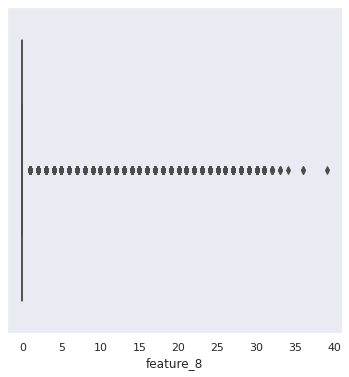

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


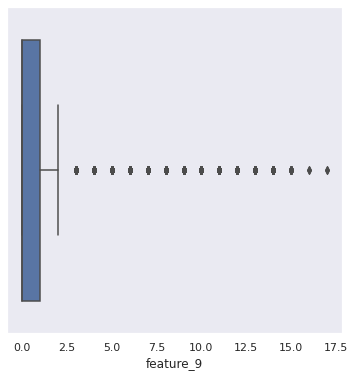

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


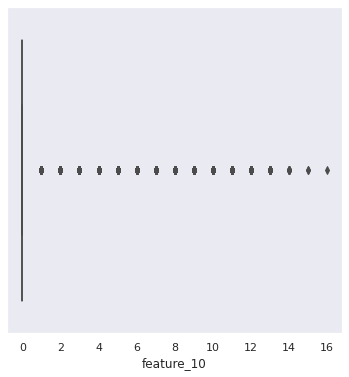

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


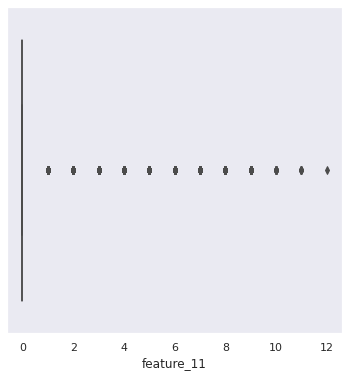

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


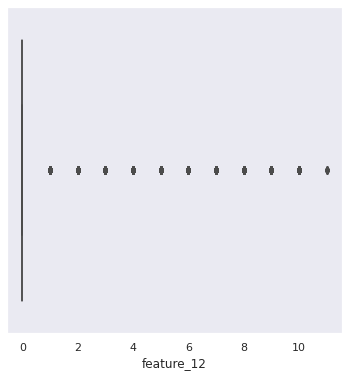

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


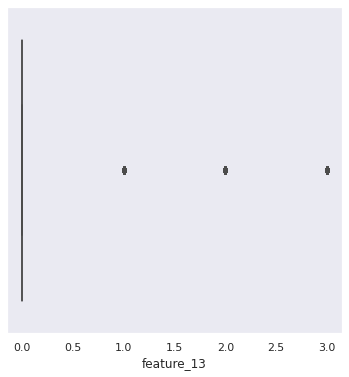

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


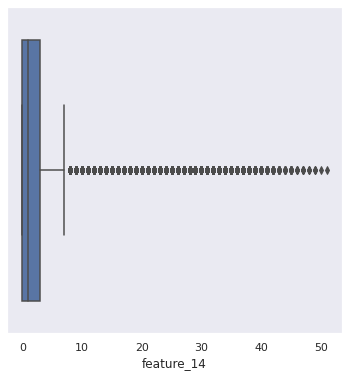

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


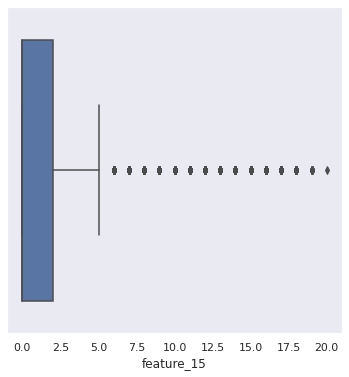

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


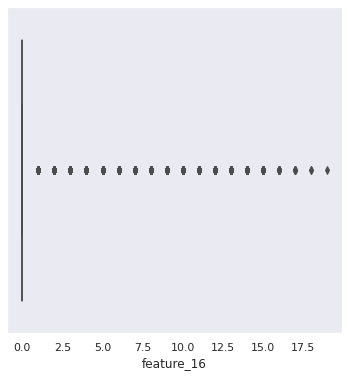

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


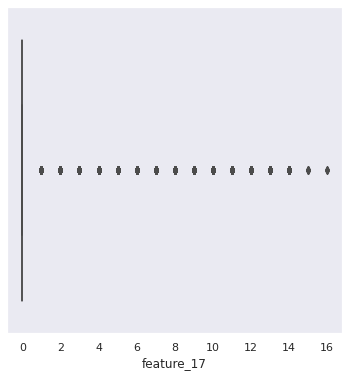

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


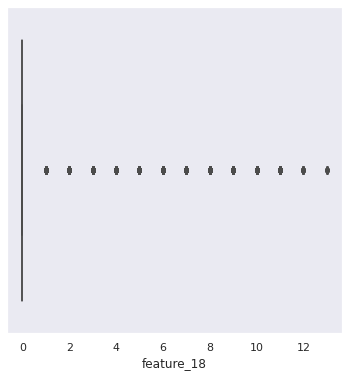

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


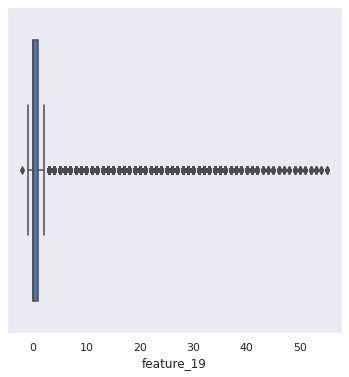

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


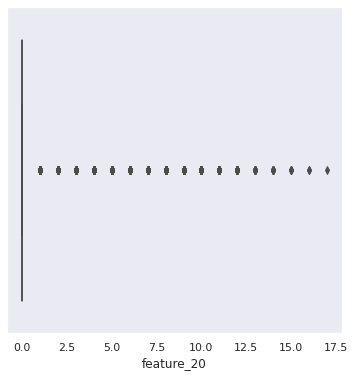

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


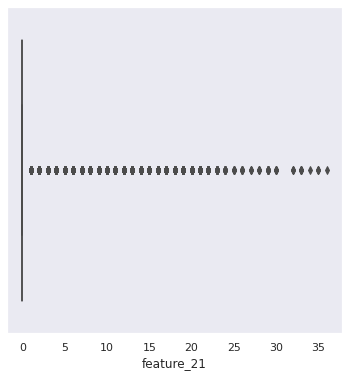

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


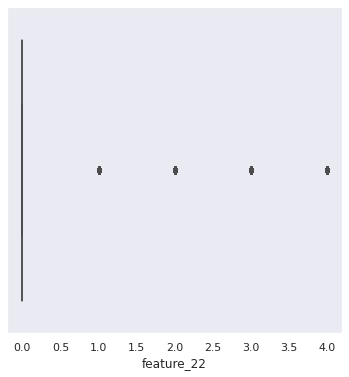

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


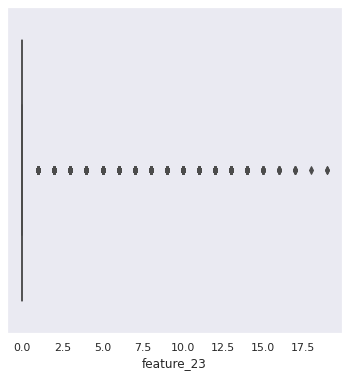

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


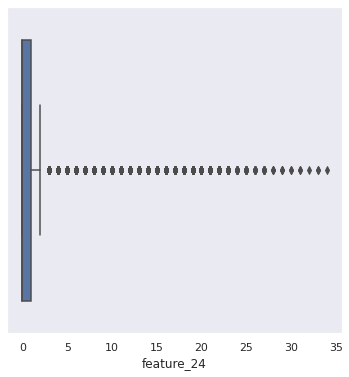

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


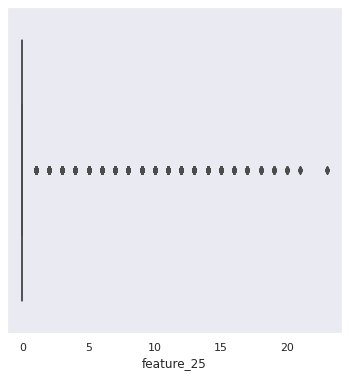

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


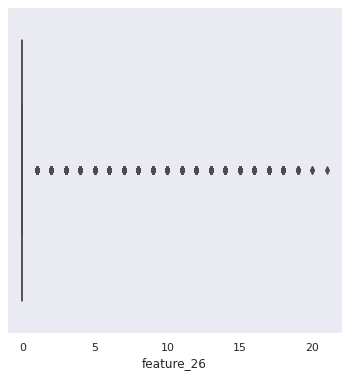

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


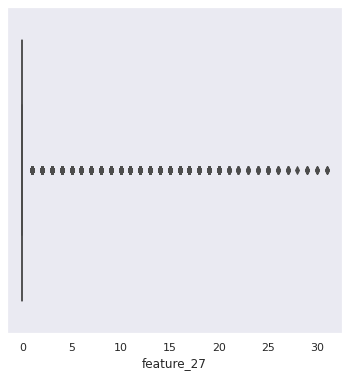

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


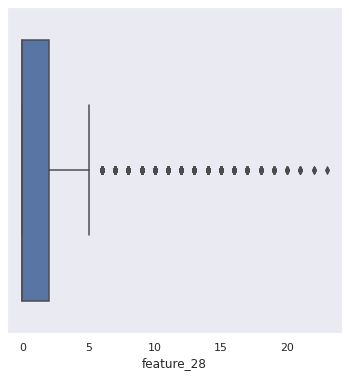

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


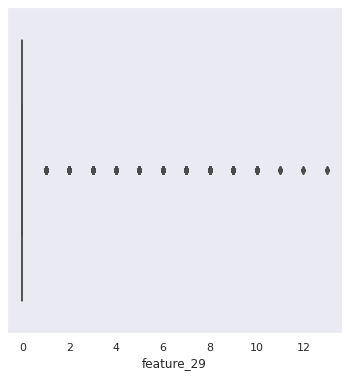

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


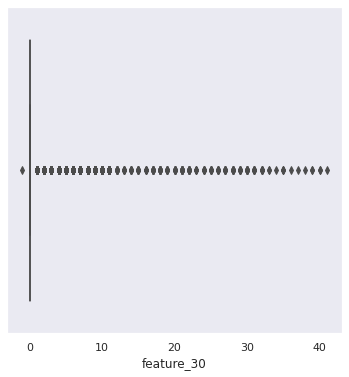

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


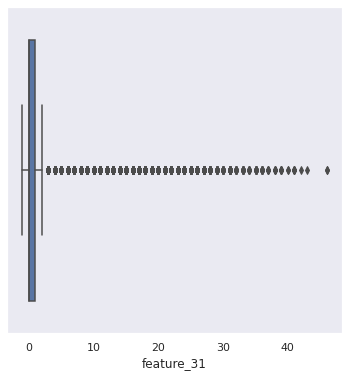

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


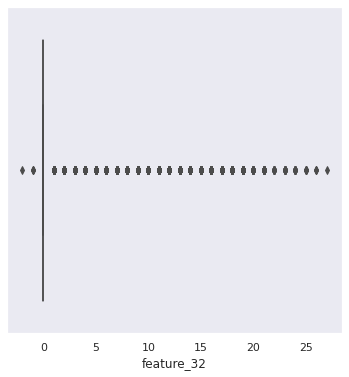

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


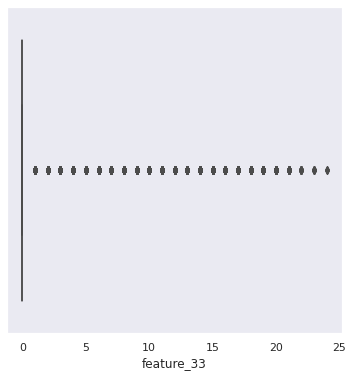

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


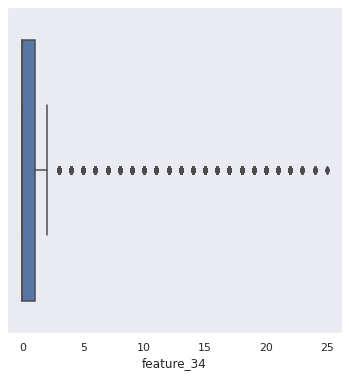

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


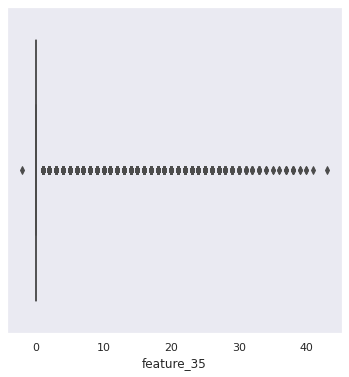

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


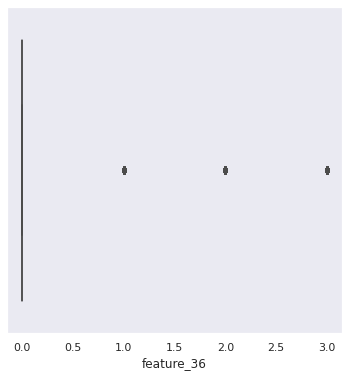

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


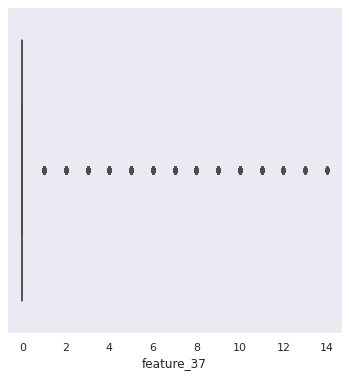

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


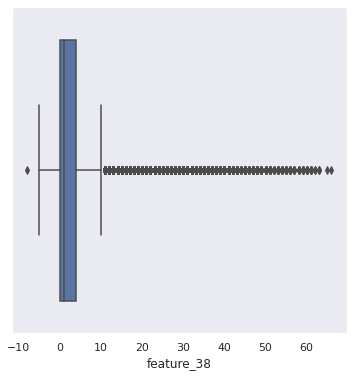

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


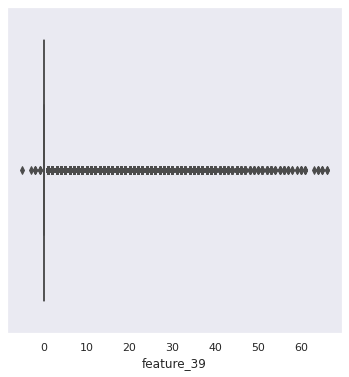

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


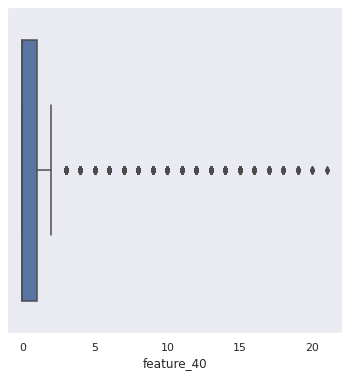

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


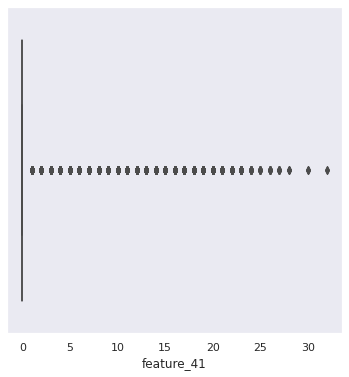

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


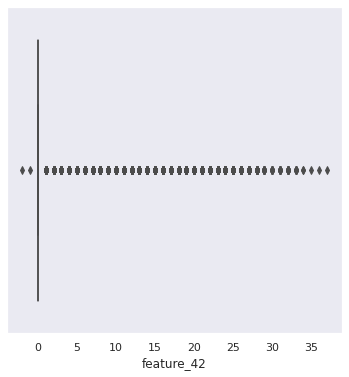

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


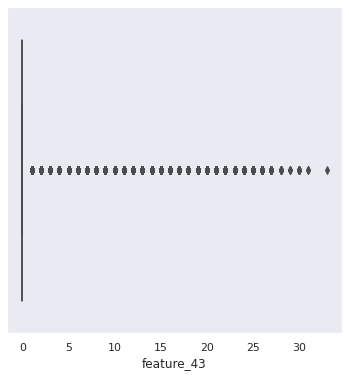

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


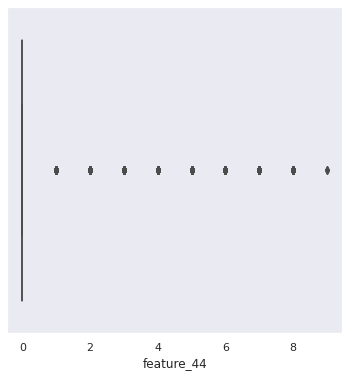

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


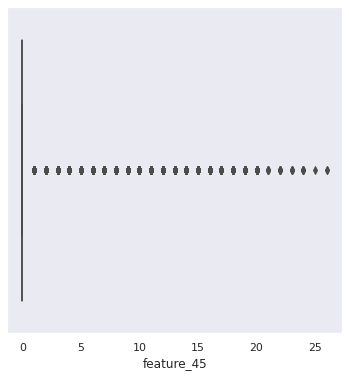

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


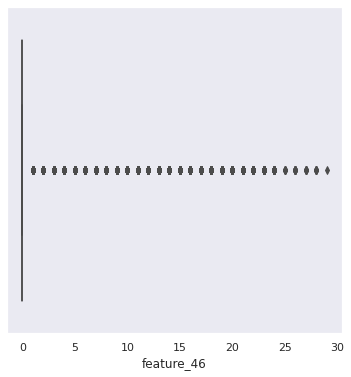

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


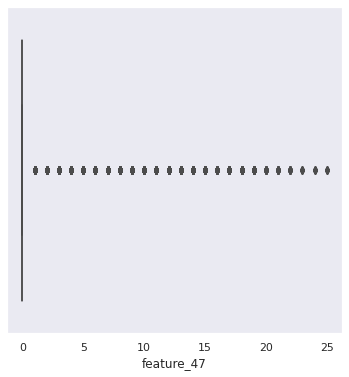

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


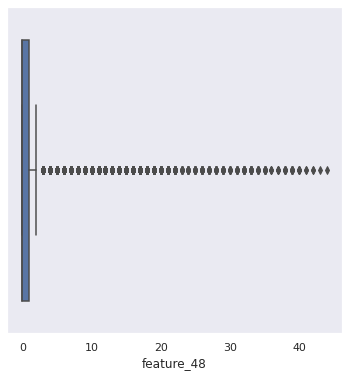

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


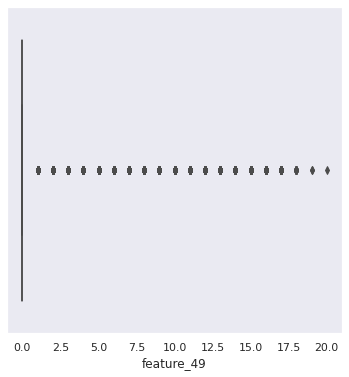

In [10]:
for column in train_EDA.columns:
    plt.figure()
    plt.grid()
    sns.set(rc={'figure.figsize':(6,6)})
    sns.boxplot(train_EDA[column])
    plt.show()

#### Outlier deletion did not work because all of these are category variables and there is little basis to classify them as outlier values !

In [ ]:
#train_EDA = train_EDA.loc[(train_EDA.feature_1 < 30) & (train_EDA.feature_3 < 25) & (train_EDA.feature_4 < 35) & (train_EDA.feature_7 < 30) & (train_EDA.feature_8 < 35) & (train_EDA.feature_19 > 0) & (train_EDA.feature_23 < 17.5) & (train_EDA.feature_25 < 22) &  (train_EDA.feature_31 < 42) & (train_EDA.feature_35 < 41) & (train_EDA.feature_38 < 64) & (train_EDA.feature_38>0) & (train_EDA.feature_39 >0) & (train_EDA.feature_41 < 31) & (train_EDA.feature_42 > 0) & (train_EDA.feature_43 < 32) & (train_EDA.feature_45 < 25) & (train_EDA.feature_48 < 42) ] 
#train_EDA= train_EDA.loc[train_EDA.feature_3 < 25]
#train_EDA= train_EDA.loc[train_EDA.feature_4 < 35]
#train_EDA= train_EDA.loc[train_EDA.feature_7 < 30]
#train_EDA = train_EDA.loc[train_EDA.feature_8 < 35]
#train_EDA = train_EDA.loc[train_EDA.feature_19 > 0]
#train_EDA = train_EDA.loc[train_EDA.feature_23 < 17.5]
#train_EDA= train_EDA.loc[train_EDA.feature_25 < 22]
#train_EDA = train_EDA.loc[train_EDA.feature_31 < 42]
#train_EDA = train_EDA.loc[train_EDA.feature_35 < 41]
#train_EDA = train_EDA.loc[(train_EDA.feature_38 < 64) & (train_EDA.feature_38>0)]
#train_EDA= train_EDA.loc[train_EDA.feature_39 >0]
#train_EDA= train_EDA.loc[train_EDA.feature_41 < 31]
#train_EDA= train_EDA.loc[train_EDA.feature_42 > 0 ]
#train_EDA = train_EDA.loc[train_EDA.feature_43 < 32]
#train_EDA = train_EDA.loc[train_EDA.feature_45 < 25]
#train_EDA = train_EDA.loc[train_EDA.feature_48 < 42]

In [11]:
train_EDA.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,...,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Importing ML libaries

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from catboost import CatBoostClassifier
from sklearn.feature_selection import chi2, f_classif, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
test=pd.read_csv('/kaggle/input/tabular-playground-series-may-2021/test.csv')
test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,...,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,...,1,0,0,0,0,0,0,0,0,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'feature_0'),
  Text(1, 0, 'feature_1'),
  Text(2, 0, 'feature_2'),
  Text(3, 0, 'feature_3'),
  Text(4, 0, 'feature_4'),
  Text(5, 0, 'feature_5'),
  Text(6, 0, 'feature_6'),
  Text(7, 0, 'feature_7'),
  Text(8, 0, 'feature_8'),
  Text(9, 0, 'feature_9'),
  Text(10, 0, 'feature_10'),
  Text(11, 0, 'feature_11'),
  Text(12, 0, 'feature_12'),
  Text(13, 0, 'feature_13'),
  Text(14, 0, 'feature_14'),
  Text(15, 0, 'feature_15'),
  Text(16, 0, 'feature_16'),
  Text(17, 0, 'feature_17'),
  Text(18, 0, 'feature_18'),
  Text(19, 0, 'feature_19'),
  Text(20, 0, 'feature_20'),
  Text(21, 0, 'feature_21'),
  Text(22, 0, 'feature_22'),
  Text(23, 0, 'feature_23'),
  Text(24, 0, 'feature_24'),
  Text(25, 0, 'feature_25'),
  Text(26, 0, 'feature_26'),
  Text(27, 

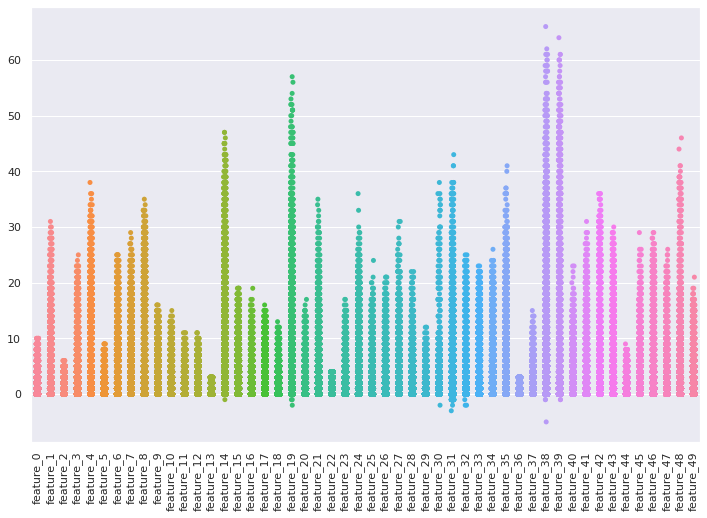

In [14]:
sns.set(rc={'figure.figsize':(12,8)})
sns.stripplot(data=test.drop(columns=['id']))
plt.xticks(rotation='vertical')


In [15]:
sample=pd.read_csv('/kaggle/input/tabular-playground-series-may-2021/sample_submission.csv')
sample.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25


## Optuna Optimization for LightGBM classifier model 

In [16]:
import optuna
from optuna import Trial,visualization

In [17]:
features=list(train_EDA.columns)
features


['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49']

In [18]:
train_EDA['target']=train['target']

In [19]:
import lightgbm
from lightgbm import LGBMClassifier


In [20]:
target=['target']

In [21]:

for feature in target:
    le=LabelEncoder()
    le.fit(train_EDA[feature])
    train_EDA[feature]=le.transform(train[feature])

In [22]:
train_x = train.drop(['target'], axis=1)
train_y = train['target']

In [ ]:
#from scipy import stats
#train_x[(np.abs(stats.zscore(train_x)) < 2.5).all(axis=1)]

In [23]:
train_x=train_x.drop(['id'],axis=1)
train_x.shape

(100000, 50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'feature_0'),
  Text(1, 0, 'feature_1'),
  Text(2, 0, 'feature_2'),
  Text(3, 0, 'feature_3'),
  Text(4, 0, 'feature_4'),
  Text(5, 0, 'feature_5'),
  Text(6, 0, 'feature_6'),
  Text(7, 0, 'feature_7'),
  Text(8, 0, 'feature_8'),
  Text(9, 0, 'feature_9'),
  Text(10, 0, 'feature_10'),
  Text(11, 0, 'feature_11'),
  Text(12, 0, 'feature_12'),
  Text(13, 0, 'feature_13'),
  Text(14, 0, 'feature_14'),
  Text(15, 0, 'feature_15'),
  Text(16, 0, 'feature_16'),
  Text(17, 0, 'feature_17'),
  Text(18, 0, 'feature_18'),
  Text(19, 0, 'feature_19'),
  Text(20, 0, 'feature_20'),
  Text(21, 0, 'feature_21'),
  Text(22, 0, 'feature_22'),
  Text(23, 0, 'feature_23'),
  Text(24, 0, 'feature_24'),
  Text(25, 0, 'feature_25'),
  Text(26, 0, 'feature_26'),
  Text(27, 

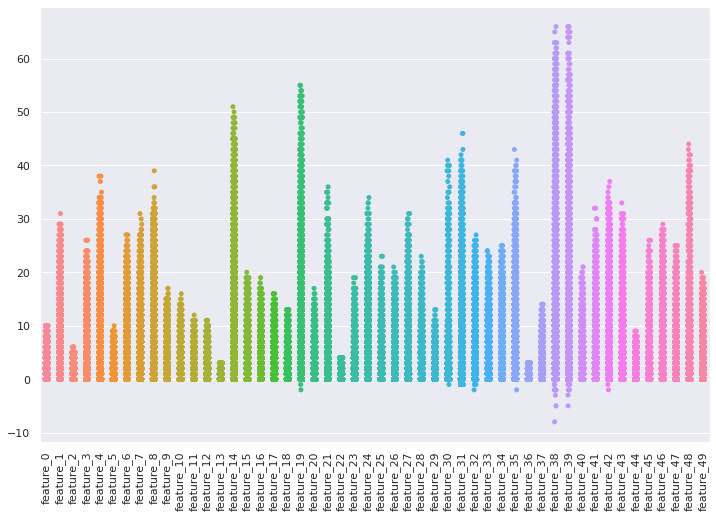

In [24]:
import matplotlib.pyplot as plt
sns.stripplot(data=train_x)
plt.xticks(rotation='vertical')


In [25]:
test_x = test.drop(['id'], axis=1)

In [26]:
test_x.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,0,0,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,2,0,7,7,...,3,0,1,0,0,0,1,0,2,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,6,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,6,9,14,3
4,0,0,0,0,0,0,1,0,4,0,...,1,0,0,0,0,0,0,0,0,0


### Objective function for OPTUNA

In [27]:
def objective(trial,data=train_x,target=train_y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=71)
    params = {
        'reg_alpha' : trial.suggest_loguniform('reg_alpha' , 1e-2 , 1000),
        'reg_lambda' : trial.suggest_loguniform('reg_lambda' , 1e-2 , 1000),
        'num_leaves' : trial.suggest_int('num_leaves' , 25 , 25),         
        'learning_rate' : trial.suggest_float('learning_rate' , 0.08 , 0.2), 
        'max_depth' : trial.suggest_int('max_depth' , 5, 5),                
        'n_estimators' : trial.suggest_int('n_estimators' , 1 ,100000),
        'min_child_samples' : trial.suggest_int('min_child_samples' , 1 , 100),
        'min_child_weight' : trial.suggest_loguniform('min_child_weight' , 1e-5 , 1),
        'subsample' : trial.suggest_float('subsample' , 0.01 , 1.0),
        'colsample_bytree' : trial.suggest_float('colsample_bytree' , 0.1 , 0.1),
    }
    model = LGBMClassifier(**params)  
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],eval_metric='multi_logloss',early_stopping_rounds=100,verbose=False)
        
    preds_opt = model.predict_proba(test_x)
 

    log_loss_multi = log_loss(test_y, preds_opt)
    return log_loss_multi


In [28]:
import warnings
warnings.filterwarnings('ignore')
OPTUNA_OPTIMIZATION=True
study=optuna.create_study(direction='minimize')
study.optimize(objective,n_trials=10)
print("finished trials--->",len(study.trials))
print("   Best study ---->  ",  study.best_trials.params)

[I 2021-06-09 13:59:12,734] A new study created in memory with name: no-name-d13d6517-1d72-4409-a896-fdbc09de76d5
[I 2021-06-09 13:59:19,649] Trial 0 finished with value: 1.0942796978434126 and parameters: {'reg_alpha': 1.1645363613832689, 'reg_lambda': 10.08266732296812, 'num_leaves': 25, 'learning_rate': 0.14332274047665639, 'max_depth': 5, 'n_estimators': 15303, 'min_child_samples': 5, 'min_child_weight': 0.0019505294586381076, 'subsample': 0.4516030360692722, 'colsample_bytree': 0.1}. Best is trial 0 with value: 1.0942796978434126.
[I 2021-06-09 14:00:02,905] Trial 1 finished with value: 1.6626025274755543 and parameters: {'reg_alpha': 403.9041078528947, 'reg_lambda': 0.07463101553250061, 'num_leaves': 25, 'learning_rate': 0.14372429157879302, 'max_depth': 5, 'n_estimators': 13681, 'min_child_samples': 66, 'min_child_weight': 0.034988428346347134, 'subsample': 0.27224708555994515, 'colsample_bytree': 0.1}. Best is trial 0 with value: 1.0942796978434126.
[I 2021-06-09 14:00:13,024] 

finished trials---> 10


AttributeError: 'list' object has no attribute 'params'

In [29]:
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(study))
    display(optuna.visualization.plot_slice(study))

In [30]:
lgbm_params=study.best_trial.params
lgbm_params

{'reg_alpha': 10.463307075589485,
 'reg_lambda': 0.20056965442018462,
 'num_leaves': 25,
 'learning_rate': 0.11827302288803895,
 'max_depth': 5,
 'n_estimators': 29804,
 'min_child_samples': 63,
 'min_child_weight': 5.3809416807276775e-05,
 'subsample': 0.795686939576079,
 'colsample_bytree': 0.1}

### Training the model with the best identified parameters

In [33]:
from tqdm import tqdm
train_oof_lgbm_0 = np.zeros((len(train_x), 4))
temp_test = np.zeros((len(test_x), 4))


lgbm_params = study.best_trial.params

NUM_FOLDS = 10
kf =  StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=137)

for f, (train_ind, val_ind) in tqdm(enumerate(kf.split(train_x, train_y))):
        print(f'Fold {f+1}')
        train_df = train_x.iloc[train_ind].reset_index(drop=True)
        val_df = train_x.iloc[val_ind].reset_index(drop=True)
        train_target = train_y.iloc[train_ind].reset_index(drop=True)
        val_target = train_y.iloc[val_ind].reset_index(drop=True)
        model = LGBMClassifier(**lgbm_params)
        model =  model.fit(train_df, train_target,eval_set=[(val_df,val_target)],early_stopping_rounds=100,verbose=False)
        
        temp_oof = model.predict_proba(val_df)
        print(log_loss(val_target, temp_oof))
        train_oof_lgbm_0[val_ind] = temp_oof

        temp_test += model.predict_proba(test_x)
        test_preds_lgbm_0 = temp_test/NUM_FOLDS

        
print('All_logloss',log_loss(train_y, train_oof_lgbm_0))
np.save('train_oof_lgbm_0', train_oof_lgbm_0 ) #for validation
np.save('test_preds_lgbm_0',test_preds_lgbm_0 ) #for submission

0it [00:00, ?it/s]

Fold 1
1.0870985349819469


1it [00:14, 14.40s/it]

Fold 2
1.0932986297860812


2it [00:27, 13.40s/it]

Fold 3
1.0910326143306608


3it [00:36, 11.66s/it]

Fold 4
1.0888544285044977


4it [00:47, 11.26s/it]

Fold 5
1.0885103506397946


5it [00:59, 11.71s/it]

Fold 6
1.0928447864579691


6it [01:10, 11.40s/it]

Fold 7
1.0895195609108062


7it [01:22, 11.46s/it]

Fold 8
1.0927342881355981


8it [01:35, 12.06s/it]

Fold 9
1.0876235412571118


9it [01:48, 12.48s/it]

Fold 10
1.0889998932682672


10it [02:01, 12.12s/it]


All_logloss 1.0900516628272732


In [34]:
submission = pd.DataFrame( test_preds_lgbm_0)
submission.columns = ['Class_1', 'Class_2', 'Class_3', 'Class_4']
submission['id'] = test['id']
submission = submission[['id', 'Class_1', 'Class_2', 'Class_3', 'Class_4']]

submission.to_csv("submission_lgbm.csv", index=False)
display(submission.head(), submission.tail())

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.097728,0.627464,0.158911,0.115897
1,100001,0.078096,0.713290,0.134277,0.074338
2,100002,0.087875,0.640755,0.177955,0.093414
3,100003,0.072641,0.539872,0.298073,0.089414
4,100004,0.077992,0.648724,0.179929,0.093355


,id,Class_1,Class_2,Class_3,Class_4
49995,149995,0.076911,0.694906,0.176947,0.051237
49996,149996,0.079002,0.676677,0.125677,0.118644
49997,149997,0.080298,0.527041,0.221542,0.171119
49998,149998,0.086569,0.602647,0.160588,0.150196
49999,149999,0.096160,0.571337,0.221562,0.110941
